# 用斜率图进行对比分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as image

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 数据源路径
filepath='./data/问卷调查结果.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath, index_col='调查年度')

# 定义画图用的数据
category_names = df.columns
labels = df.index
data = df.values
data_cum = data.cumsum(axis=1)

### 3. 开始画图

用「**面向对象**」的方法画图。

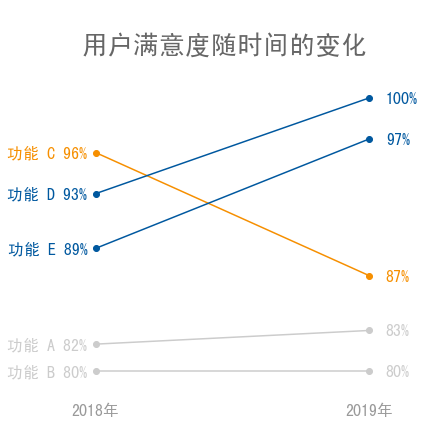

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax=plt.subplots(figsize=(6, 6))

# 设置背景颜色
fig.set_facecolor('w')
ax.set_facecolor('w')

# 设置标题
ax.set_title('\n用户满意度随时间的变化\n', fontsize=26, loc='left', color=c['深灰色'])

# 定义颜色
category_colors = [c['浅灰色'], c['浅灰色'], c['橙色'], c['蓝色'], c['蓝色']]

# 画斜率图
for i, color in zip(np.arange(len(df.columns)), category_colors):
    ax.plot(df.index, df.iloc[:, i], marker='o', color=color)
    
    # 设置数据标签及其文字颜色
    ax.text(-0.03, df.iloc[0, i], df.columns[i] + ' ' + '{:.0%}'.format(df.iloc[0, i]), ha='right', va='center', color=color, fontsize=16)
    ax.text(1.06, df.iloc[1, i], '{:.0%}'.format(df.iloc[1, i]), ha='left', va='center', color=color, fontsize=16)

# 设置 Y 轴刻度范围
ax.set_ylim(df.values.min()-0.02, df.values.max()+0.01)

# 隐藏 Y 轴
ax.yaxis.set_visible(False)

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 隐藏 X 轴的刻度线
ax.tick_params(axis='x', which='major', length=0)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['灰色'])

plt.show()